# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  


# Load Dataset

In [24]:
file_path = "C:/Users/Azang/Documents/retail-sales-analysis/Online-Retaill-II-EDA/data/online_retail_II_clean.xlsx"
df = pd.read_excel(file_path)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (524875, 9)


,invoice,stock_code,description,price,quantity,total_price,invoice_date,customer_id,country
0,536365,85123A,White Hanging Heart T-Light Holder,2.55,6,15.30,2010-12-01 08:26:00,17850,United Kingdom
1,536365,71053,White Metal Lantern,3.39,6,20.34,2010-12-01 08:26:00,17850,United Kingdom
2,536365,84406B,Cream Cupid Hearts Coat Hanger,2.75,8,22.00,2010-12-01 08:26:00,17850,United Kingdom
3,536365,84029G,Knitted Union Flag Hot Water Bottle,3.39,6,20.34,2010-12-01 08:26:00,17850,United Kingdom
4,536365,84029E,Red Woolly Hottie White Heart.,3.39,6,20.34,2010-12-01 08:26:00,17850,United Kingdom


# Dataset Overview

In [25]:
df.info()      # check column types & missing values
df.describe()  # numerical summary
df.nunique()   # number of unique values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524875 entries, 0 to 524874
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice       524875 non-null  object        
 1   stock_code    524875 non-null  object        
 2   description   524875 non-null  object        
 3   price         524875 non-null  float64       
 4   quantity      524875 non-null  int64         
 5   total_price   524875 non-null  float64       
 6   invoice_date  524875 non-null  datetime64[ns]
 7   customer_id   524875 non-null  object        
 8   country       524875 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 36.0+ MB


invoice         19960
stock_code       3921
description      4025
price            1290
quantity          375
total_price      4905
invoice_date    18499
customer_id      4339
country            38
dtype: int64

In [ ]:
# Data Quality Checks

In [26]:
# Check missing values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()

# Preview some duplicate rows (if any)
df[df.duplicated()].head()


,invoice,stock_code,description,price,quantity,total_price,invoice_date,customer_id,country


# Basic Explorations

C:\Users\Azang\AppData\Local\Temp\ipykernel_5876\1760926296.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


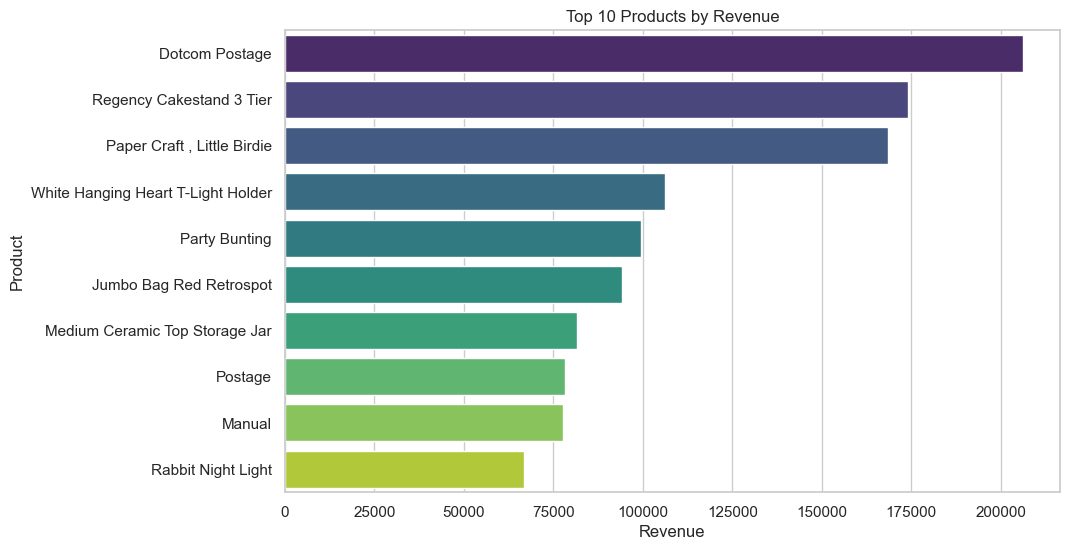

In [29]:
# Top 10 products by total revenue
top_products = (
    df.groupby('description')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()


# Revenue by Country

C:\Users\Azang\AppData\Local\Temp\ipykernel_5876\2197737944.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.index[:10], y=country_revenue.values[:10], palette="coolwarm")


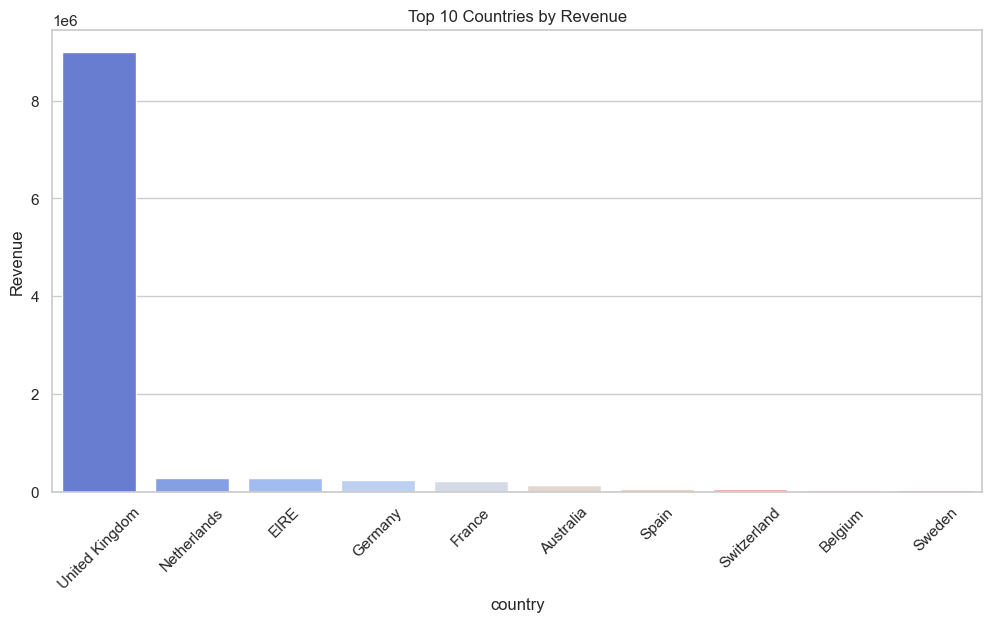

In [31]:
# Revenue per country
country_revenue = (
    df.groupby('country')['total_price']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(x=country_revenue.index[:10], y=country_revenue.values[:10], palette="coolwarm")
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


# Monthly Revenue Trend

C:\Users\Azang\AppData\Local\Temp\ipykernel_5876\420659874.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['total_price']


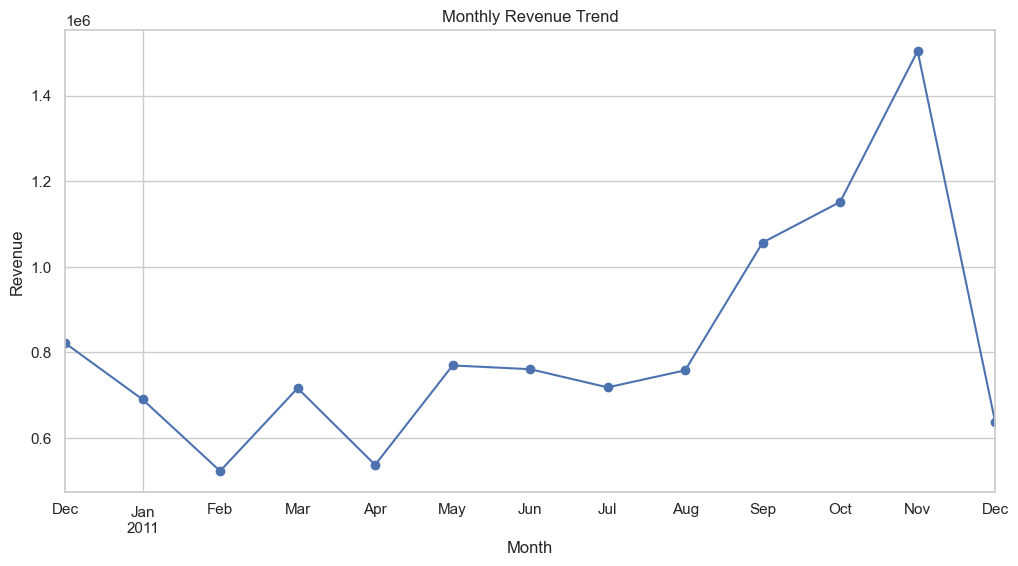

In [33]:
# Ensure InvoiceDate is datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Group by month
monthly_revenue = (
    df.set_index('invoice_date')
    .resample('M')['total_price']
    .sum()
)

plt.figure(figsize=(12,6))
monthly_revenue.plot(marker="o")
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()
